# Prediction using Naive Bayes Classifier 

In [3]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
os.getcwd()

os.chdir('C:\\Users\\iZfig\OneDrive\Desktop\Mini_project\DataSet')

df=pd.read_csv('df_clean.csv')
df.head()

,Year,Month,Day,Rain,Evap,MaxTemp,MinTemp,WindVelocity,Solar_Radiation,Bright_Sunshine,Rel_Humidity,PM2.5
0,2018,1,1,0.0,3.3,29.8,10.4,2.4,16.2,9.3,89,56.22
1,2018,1,2,0.0,4.0,29.6,11.4,2.1,15.8,9.0,89,63.57
2,2018,1,3,0.0,3.6,29.2,13.4,3.2,12.7,8.4,88,72.61
3,2018,1,4,0.0,3.5,28.6,10.8,3.4,13.9,6.0,89,68.25
4,2018,1,5,0.0,4.6,28.2,9.6,4.4,14.1,7.3,88,70.88


In [4]:
df.head()

,Year,Month,Day,Rain,Evap,MaxTemp,MinTemp,WindVelocity,Solar_Radiation,Bright_Sunshine,Rel_Humidity,PM2.5
0,2018,1,1,0.0,3.3,29.8,10.4,2.4,16.2,9.3,89,56.22
1,2018,1,2,0.0,4.0,29.6,11.4,2.1,15.8,9.0,89,63.57
2,2018,1,3,0.0,3.6,29.2,13.4,3.2,12.7,8.4,88,72.61
3,2018,1,4,0.0,3.5,28.6,10.8,3.4,13.9,6.0,89,68.25
4,2018,1,5,0.0,4.6,28.2,9.6,4.4,14.1,7.3,88,70.88


# NO Null Values Since thet data has already been Cleaned

# Data Transformation
Our data is Numerical or Continous.
We have to convert it into Categorical Values which means we have to Label the Intevals

In [5]:
#Labelling the Target(PM2.5)
df['target_cd'] = pd.cut(df['PM2.5'],bins=[0,50,500], labels=[0,1])
df['target_cd']

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     0
      ..
555    0
556    0
557    0
558    0
559    0
560    0
561    0
562    0
563    0
564    0
565    0
566    0
567    0
568    0
569    0
570    0
571    0
572    0
573    0
574    0
575    0
576    0
577    0
578    0
579    0
580    0
581    0
582    0
583    0
584    0
Name: target_cd, Length: 585, dtype: category
Categories (2, int64): [0 < 1]

In [6]:
df.head()

,Year,Month,Day,Rain,Evap,MaxTemp,MinTemp,WindVelocity,Solar_Radiation,Bright_Sunshine,Rel_Humidity,PM2.5,target_cd
0,2018,1,1,0.0,3.3,29.8,10.4,2.4,16.2,9.3,89,56.22,1
1,2018,1,2,0.0,4.0,29.6,11.4,2.1,15.8,9.0,89,63.57,1
2,2018,1,3,0.0,3.6,29.2,13.4,3.2,12.7,8.4,88,72.61,1
3,2018,1,4,0.0,3.5,28.6,10.8,3.4,13.9,6.0,89,68.25,1
4,2018,1,5,0.0,4.6,28.2,9.6,4.4,14.1,7.3,88,70.88,1


In [7]:
#Dropping all the Unnecessary Coloumns

df=df.drop(['Year','Month','Day','Evap','MaxTemp','Solar_Radiation','Rel_Humidity','target_cd'], axis=1)

In [8]:
df


,Rain,MinTemp,WindVelocity,Bright_Sunshine,PM2.5
0,0.0,10.4,2.4,9.3,56.22
1,0.0,11.4,2.1,9.0,63.57
2,0.0,13.4,3.2,8.4,72.61
3,0.0,10.8,3.4,6.0,68.25
4,0.0,9.6,4.4,7.3,70.88
5,0.0,9.0,3.1,8.0,71.56
6,0.0,10.2,3.6,8.3,68.19
7,0.0,10.0,4.0,7.7,68.46
8,0.0,10.4,5.6,7.5,77.07
9,0.0,11.6,4.5,4.2,71.34


In [9]:
df['Rain'].values

array([ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0.4,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. , 12. , 14.6,  0.7,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0.4,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0.5,  0. , 11.6,  0. ,  7. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  2.2,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  3.8, 33.4,  4

In [10]:
#Labelling The Target
df['PM2.5'] = pd.cut(df['PM2.5'], bins=[0, 50,float('Inf')], labels=['YES', 'NO'])


In [11]:
df

,Rain,MinTemp,WindVelocity,Bright_Sunshine,PM2.5
0,0.0,10.4,2.4,9.3,NO
1,0.0,11.4,2.1,9.0,NO
2,0.0,13.4,3.2,8.4,NO
3,0.0,10.8,3.4,6.0,NO
4,0.0,9.6,4.4,7.3,NO
5,0.0,9.0,3.1,8.0,NO
6,0.0,10.2,3.6,8.3,NO
7,0.0,10.0,4.0,7.7,NO
8,0.0,10.4,5.6,7.5,NO
9,0.0,11.6,4.5,4.2,NO


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 585 entries, 0 to 584
Data columns (total 5 columns):
Rain               585 non-null float64
MinTemp            585 non-null float64
WindVelocity       585 non-null float64
Bright_Sunshine    585 non-null float64
PM2.5              585 non-null category
dtypes: category(1), float64(4)
memory usage: 19.0 KB


In [13]:
# Labelling Rainfall(in mm)
df['Rain'] = pd.cut(df['Rain'], bins=[0,5,float('Inf')], labels=['NO', 'YES'])

In [14]:
#Filling the NaN values with Mode
df['Rain'] = df['Rain'].fillna("NO")

In [15]:
df

,Rain,MinTemp,WindVelocity,Bright_Sunshine,PM2.5
0,NO,10.4,2.4,9.3,NO
1,NO,11.4,2.1,9.0,NO
2,NO,13.4,3.2,8.4,NO
3,NO,10.8,3.4,6.0,NO
4,NO,9.6,4.4,7.3,NO
5,NO,9.0,3.1,8.0,NO
6,NO,10.2,3.6,8.3,NO
7,NO,10.0,4.0,7.7,NO
8,NO,10.4,5.6,7.5,NO
9,NO,11.6,4.5,4.2,NO


In [16]:
#Labelling MinTemp
df['MinTemp'] = pd.cut(df['MinTemp'], bins=[0,20,float('Inf')], labels=['COOL', 'HOT'])
df

,Rain,MinTemp,WindVelocity,Bright_Sunshine,PM2.5
0,NO,COOL,2.4,9.3,NO
1,NO,COOL,2.1,9.0,NO
2,NO,COOL,3.2,8.4,NO
3,NO,COOL,3.4,6.0,NO
4,NO,COOL,4.4,7.3,NO
5,NO,COOL,3.1,8.0,NO
6,NO,COOL,3.6,8.3,NO
7,NO,COOL,4.0,7.7,NO
8,NO,COOL,5.6,7.5,NO
9,NO,COOL,4.5,4.2,NO


(array([326., 224.,  34.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 0.5 ,  7.25, 14.  , 20.75, 27.5 , 34.25, 41.  , 47.75, 54.5 ,
        61.25, 68.  ]),
 <a list of 10 Patch objects>)

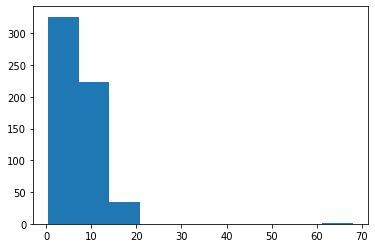

In [17]:
plt.hist(df['WindVelocity'],10)

In [18]:
#Labelling Wind Velocity
df['WindVelocity'] = pd.cut(df['WindVelocity'], bins=[0,11,28,float('Inf')], labels=['Light_Breeze','Moderete_Breeze','Windy'])
df

,Rain,MinTemp,WindVelocity,Bright_Sunshine,PM2.5
0,NO,COOL,Light_Breeze,9.3,NO
1,NO,COOL,Light_Breeze,9.0,NO
2,NO,COOL,Light_Breeze,8.4,NO
3,NO,COOL,Light_Breeze,6.0,NO
4,NO,COOL,Light_Breeze,7.3,NO
5,NO,COOL,Light_Breeze,8.0,NO
6,NO,COOL,Light_Breeze,8.3,NO
7,NO,COOL,Light_Breeze,7.7,NO
8,NO,COOL,Light_Breeze,7.5,NO
9,NO,COOL,Light_Breeze,4.2,NO


(array([ 64.,  21.,  22.,  29.,  34.,  46.,  94., 163., 100.,  12.]),
 array([ 0.  ,  1.18,  2.36,  3.54,  4.72,  5.9 ,  7.08,  8.26,  9.44,
        10.62, 11.8 ]),
 <a list of 10 Patch objects>)

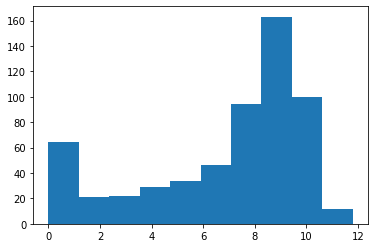

In [19]:
plt.hist(df['Bright_Sunshine'],10)

In [20]:
#Labelling Bright_Sunshine
df['Bright_Sunshine'] = pd.cut(df['Bright_Sunshine'], bins=[0.0,4,float('Inf')], labels=['NO','YES'])
df

,Rain,MinTemp,WindVelocity,Bright_Sunshine,PM2.5
0,NO,COOL,Light_Breeze,YES,NO
1,NO,COOL,Light_Breeze,YES,NO
2,NO,COOL,Light_Breeze,YES,NO
3,NO,COOL,Light_Breeze,YES,NO
4,NO,COOL,Light_Breeze,YES,NO
5,NO,COOL,Light_Breeze,YES,NO
6,NO,COOL,Light_Breeze,YES,NO
7,NO,COOL,Light_Breeze,YES,NO
8,NO,COOL,Light_Breeze,YES,NO
9,NO,COOL,Light_Breeze,YES,NO


In [21]:
#Filling NaN values.
df.head()
df['Bright_Sunshine'] = df['Bright_Sunshine'].fillna("YES")

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 585 entries, 0 to 584
Data columns (total 5 columns):
Rain               585 non-null category
MinTemp            585 non-null category
WindVelocity       585 non-null category
Bright_Sunshine    585 non-null category
PM2.5              585 non-null category
dtypes: category(5)
memory usage: 3.4 KB


# Data Transformed!

In [23]:
#Only Categorical Values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 585 entries, 0 to 584
Data columns (total 5 columns):
Rain               585 non-null category
MinTemp            585 non-null category
WindVelocity       585 non-null category
Bright_Sunshine    585 non-null category
PM2.5              585 non-null category
dtypes: category(5)
memory usage: 3.4 KB


# Checking the no of values:

In [24]:
Rain_count = df.groupby(['Rain', 'PM2.5']).size()
print("Checking Outlook Variable for Play Segregation: \n",Rain_count)
Rain_total = df.groupby(['Rain']).size()
print("Checking Total Outlook: ",Rain_total)

Checking Outlook Variable for Play Segregation: 
 Rain  PM2.5
NO    YES      369
      NO       164
YES   YES       49
      NO         3
dtype: int64
Checking Total Outlook:  Rain
NO     533
YES     52
dtype: int64


In [25]:
MT_count = df.groupby(['MinTemp', 'PM2.5']).size()
print("Checking 'MINIMUM Tem' Variable for Play Segregation: \n",MT_count)
MT_total = df.groupby(['MinTemp']).size()
print("Checking Total MINIMUM Temp: ",MT_total)

Checking 'MINIMUM Tem' Variable for Play Segregation: 
 MinTemp  PM2.5
COOL     YES       71
         NO       147
HOT      YES      347
         NO        20
dtype: int64
Checking Total MINIMUM Temp:  MinTemp
COOL    218
HOT     367
dtype: int64


In [26]:
WV_count = df.groupby(['WindVelocity', 'PM2.5']).size()
WV_total = df.groupby(['WindVelocity']).size()
print("WindVelocity Variable for PM2.5 Segregation: \n",WV_count)
print("--------------------------------------------------------")
print("WindVelocity-PM2.5\n",WV_total)

WindVelocity Variable for PM2.5 Segregation: 
 WindVelocity     PM2.5
Light_Breeze     YES      317
                 NO       166
Moderete_Breeze  YES      101
Windy            NO         1
dtype: int64
--------------------------------------------------------
WindVelocity-PM2.5
 WindVelocity
Light_Breeze       483
Moderete_Breeze    101
Windy                1
dtype: int64


In [27]:
BS_count = df.groupby(['Bright_Sunshine', 'PM2.5']).size()
BS_total = df.groupby(['Bright_Sunshine']).size()
print("Bright_Sunshine Variable for PM2.5 Segregation: \n",BS_count)
print("--------------------------------------------------------")
print("Bright_Sunshine-PM2.5\n",BS_total)

Bright_Sunshine Variable for PM2.5 Segregation: 
 Bright_Sunshine  PM2.5
NO               YES       68
                 NO        13
YES              YES      350
                 NO       154
dtype: int64
--------------------------------------------------------
Bright_Sunshine-PM2.5
 Bright_Sunshine
NO      81
YES    504
dtype: int64


# Creating Dummy DataSet by Taking Dummy_Variables

In [28]:
X= pd.get_dummies(df[['Rain', 'MinTemp', 'WindVelocity', 'Bright_Sunshine']])
y= pd.DataFrame(df['PM2.5'])

In [29]:
X.head()

,Rain_NO,Rain_YES,MinTemp_COOL,MinTemp_HOT,WindVelocity_Light_Breeze,WindVelocity_Moderete_Breeze,WindVelocity_Windy,Bright_Sunshine_NO,Bright_Sunshine_YES
0,1,0,1,0,1,0,0,0,1
1,1,0,1,0,1,0,0,0,1
2,1,0,1,0,1,0,0,0,1
3,1,0,1,0,1,0,0,0,1
4,1,0,1,0,1,0,0,0,1


In [30]:
y.head()

,PM2.5
0,NO
1,NO
2,NO
3,NO
4,NO


In [31]:
# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state=1)

In [32]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [33]:
y_predictions=model.predict(X_test)
y_predictions

array(['NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES',
       'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'YES', 'NO', 'YES',
       'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'YES', 'NO', 'YES', 'YES',
       'NO', 'NO', 'NO', 'YES', 'YES', 'NO', 'YES', 'NO', 'YES', 'NO',
       'NO', 'NO', 'NO', 'YES', 'YES', 'YES', 'NO', 'NO', 'NO', 'NO',
       'YES', 'NO', 'YES', 'NO', 'NO', 'YES', 'NO', 'YES', 'YES', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'NO', 'NO',
       'NO', 'YES', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'NO', 'NO'], dtype='<U3')

In [34]:
#Check model accuracy
from sklearn.metrics import confusion_matrix
conf_matrix=confusion_matrix(y_predictions,y_test)
conf_matrix

array([[33, 57],
       [ 1, 26]], dtype=int64)

In [35]:
from sklearn.metrics import accuracy_score
acc_sco=accuracy_score(y_test,y_predictions)
acc_sco

0.5042735042735043

In [36]:
#Low Accuracy is because there is less DATA

In [37]:
predicted= model.predict([[0,1,0,0,1,0,1,0,1]])

In [38]:
if predicted=='YES':
    print("PM2.5 Concentration is high")
else:
    print("PM2.5 Concentration is low")

PM2.5 Concentration is high


# Cross Val

In [39]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, y_train, cv=5)

# Print the accuracy of each fold:
print(scores)

# Print the mean accuracy of all 5 folds
print(scores.mean())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[0.4893617  0.4893617  0.5        0.53763441 0.46236559]
0.4957446808510638


# this Accuracy might be due the lack of data in ICRISAT Station